<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_CommunityDescription_Joplin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joplin Testbed - Initial Interdependent Community Description

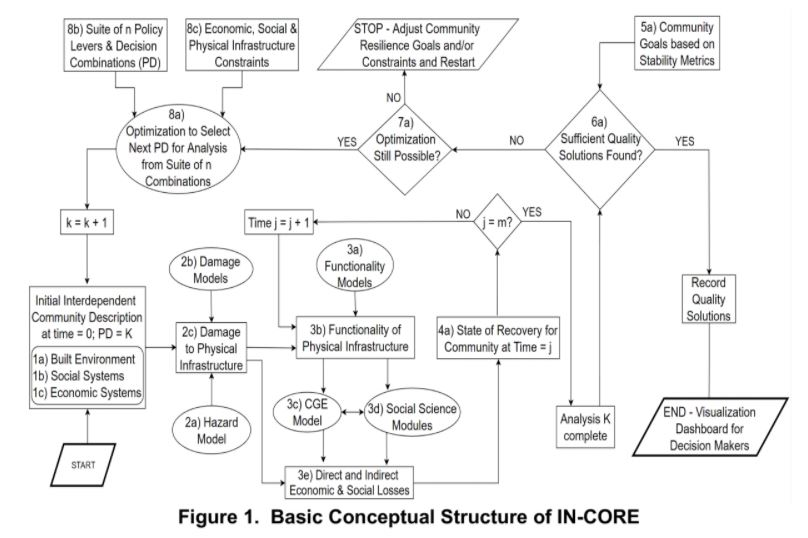

# Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdepent community description at time 0 and with policy levers and decision combinations set to K (baseline case). The community description includes three parts - the built enviroment, social systems, and economic systems. This notebook helps explore the data currently available in IN-CORE for the Joplin Testbed.

Joplin, MO is a community located in southwest Missouri. The city has been repeatedly impacted by tornado hazards.

In [ ]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

C:\Users\nathanael99\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
pandas version:  0.24.2
numpy version:  1.20.1


In [ ]:
# Check working directory - good practice for relative path access
os.getcwd()

'G:\\Shared drives\\HRRC_IN-CORE\\Tasks\\_LearnPython_IN-CORE\\WorkNPR'

In [ ]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Enter username: natrose
Enter password: ········
Connection successful to IN-CORE services. pyIncore version detected: 0.9.0


In [ ]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built enviroment: Building Inventory

The building inventory for Joplin consists of...

In [ ]:
# Joplin Building Inventory v6
bldg_inv_id = "5dbc8478b9219c06dd242c0d"
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5dbc8478b9219c06dd242c0d\joplin_bldg_inventory_v6\joplin_bldg_inventory_v6.shp


In [ ]:
bldg_inv_gdf = gpd.read_file(filename)
bldg_inv_gdf.crs = {'init': 'epsg:4326'}
bldg_inv_gdf.head()

,archetype,parid,struct_typ,year_built,no_stories,a_stories,b_stories,bsmt_type,sq_foot,gsq_foot,...,efacility,dwell_unit,str_typ2,occ_typ2,guid,strctid,appr_bldg,appr_land,appr_tot,geometry
0,1,P00019200310012011000,None,1925.0,None,None,None,None,None,2147,...,None,1,None,None,b497b88f-a4ba-48b1-8438-5cfc68147cfc,S0018614,93440.0,4230.0,97670.0,POINT (-94.51719 37.09726)
1,1,P00019200310012010000,None,1925.0,None,None,None,None,None,1439,...,None,1,None,None,6eadcc3e-7bb5-463a-aca8-f1d16f8ac7cc,S0018615,36220.0,4230.0,40450.0,POINT (-94.51716 37.09740)
2,1,P00019200310012009000,None,1925.0,None,None,None,None,None,685,...,None,0,None,None,758fb3de-108a-4e04-895e-fdc4b8627876,S0018616,38310.0,4230.0,42540.0,POINT (-94.51690 37.09756)
3,1,P00019200310012009000,None,1925.0,None,None,None,None,None,2120,...,None,1,None,None,7b706697-bf9b-4883-90f6-862d67a8e64b,S0018617,38310.0,4230.0,42540.0,POINT (-94.51712 37.09755)
4,1,P00019200310012008000,None,1900.0,None,None,None,None,None,1743,...,None,1,None,None,19c91f9b-f679-4263-b7a3-e76fd859c4b1,S0018618,42490.0,4230.0,46720.0,POINT (-94.51716 37.09768)


In [ ]:
bldg_inv_gdf.columns

Index(['archetype', 'parid', 'struct_typ', 'year_built', 'no_stories',
       'a_stories', 'b_stories', 'bsmt_type', 'sq_foot', 'gsq_foot',
       'occ_type', 'occ_detail', 'major_occ', 'broad_occ', 'repl_cst',
       'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility',
       'dwell_unit', 'str_typ2', 'occ_typ2', 'guid', 'strctid', 'appr_bldg',
       'appr_land', 'appr_tot', 'geometry'],
      dtype='object')

In [ ]:
bldg_inv_gdf[['guid','strctid','struct_typ','struct_typ','year_built','occ_type']].head()

,guid,strctid,struct_typ,struct_typ,year_built,occ_type
0,b497b88f-a4ba-48b1-8438-5cfc68147cfc,S0018614,None,None,1925.0,RES1
1,6eadcc3e-7bb5-463a-aca8-f1d16f8ac7cc,S0018615,None,None,1925.0,RES1
2,758fb3de-108a-4e04-895e-fdc4b8627876,S0018616,None,None,1925.0,None
3,7b706697-bf9b-4883-90f6-862d67a8e64b,S0018617,None,None,1925.0,RES1
4,19c91f9b-f679-4263-b7a3-e76fd859c4b1,S0018618,None,None,1900.0,RES1


In [ ]:
bldg_inv_gdf[['guid','strctid','struct_typ','year_built','occ_type']].groupby('occ_type').count()

,guid,strctid,struct_typ,year_built
occ_type,,,,
RES1,10045,10045,0,9101


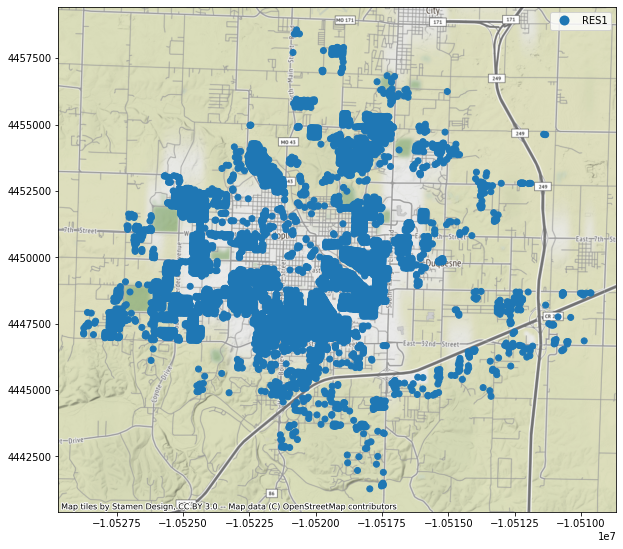

In [ ]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='occ_type')
map

## 1b) Social Systems: Housing Unit Inventory

The housing unit inventory includes characteristics for individual households and housing units that can be linked to residential buildings. 
For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. doi.org/10.1080/23789689.2019.1681821


In [ ]:
# Joplin Housing Unit Inventory
housing_unit_inv_id = "5dfd1104fc33d500081556b6"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5dfd1104fc33d500081556b6\IN-CORE_2ev3_SetupJoplin_FourInventories_2019-08-06_HUinventory\IN-CORE_2ev3_SetupJoplin_FourInventories_2019-08-06_HUinventory.csv


In [ ]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,huid,blockid,tractid,bgid,FIPScounty,serialno,livetype,numprec,gqpop,ownershp,race,hispan,hispan_flag,vacancy,gqtype,hhinc
0,B290970101001000H001,290970101001000,29097010100,290970101001,29097,1,H,3,0,1.0,1.0,0.0,1.0,0,0,3.0
1,B290970101001000H002,290970101001000,29097010100,290970101001,29097,2,H,1,0,2.0,1.0,0.0,1.0,0,0,2.0
2,B290970101001000H003,290970101001000,29097010100,290970101001,29097,3,H,1,0,1.0,1.0,0.0,1.0,0,0,3.0
3,B290970101001001H001,290970101001001,29097010100,290970101001,29097,1,H,1,0,1.0,1.0,0.0,1.0,0,0,2.0
4,B290970101001002H001,290970101001002,29097010100,290970101001,29097,1,H,6,0,2.0,1.0,0.0,1.0,0,0,3.0


In [ ]:
housing_unit_inv_df.columns

Index(['huid', 'blockid', 'tractid', 'bgid', 'FIPScounty', 'serialno',
       'livetype', 'numprec', 'gqpop', 'ownershp', 'race', 'hispan',
       'hispan_flag', 'vacancy', 'gqtype', 'hhinc'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

### Race and Ethnicity
The housing unit inventory includes variables for race and ethnicity.

In [ ]:
housing_unit_inv_df['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
housing_unit_inv_df['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

housing_unit_inv_df.loc[(housing_unit_inv_df['race'] == 1) & 
                        (housing_unit_inv_df['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['race'] == 2) & 
                        (housing_unit_inv_df['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['race'].isin([3,4,5,6,7])) & 
                        (housing_unit_inv_df['hispan'] == 0),'Race Ethnicity'] = "3 Other Race, Not Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['hispan'] == 1),'Race Ethnicity'] = "4 Any Race, Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['gqtype'] >= 1),'Race Ethnicity'] = "5 Group Quarters no Race Ethnicity Data"

housing_unit_inv_df['Tenure Status'] = "0 No Tenure Status"
housing_unit_inv_df.loc[(housing_unit_inv_df['ownershp'] == 1),'Tenure Status'] = "1 Owner Occupied"
housing_unit_inv_df.loc[(housing_unit_inv_df['ownershp'] == 2),'Tenure Status'] = "2 Renter Occupied"
housing_unit_inv_df['Tenure Status'].notes = "Identify Tenure Status Housing Unit Characteristics."

In [ ]:
table = pd.pivot_table(housing_unit_inv_df, values='numprec', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc=[np.sum]).rename(
    columns={'Total': 'Total Population', 'sum': ''})
table_title = "Table 1. Total Population by Race, Ethncity, and Tenure Status, Jefferson and Newton Counties, 2010."
varformat = {('','Total Population'): "{:,.0f}",
             ('','1 Owner Occupied'): "{:,.0f}",
             ('','2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)

## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [ ]:
# Housing unit and Building Inventories have been loaded
# Galveston, TX Address point inventory
address_point_inv_id = "5dbc6ba1b9219c06dd222bab"

In [ ]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
hua.load_remote_input_dataset("buildings", bldg_inv_id)

# Specify the result name
result_name = "Joplin_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [ ]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

### Explore results from Housing Unit Allocation

In [ ]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','hhinc','geometry','aphumerge']].head()

,guid,numprec,hhinc,geometry,aphumerge
0,59fc3532-2c7d-4d68-b7d5-5a7b6ed4a556,1.0,3.0,POINT (-94.50025605670984 37.09839824699493),both
1,535a461c-f028-4e05-9100-43541b645f1c,3.0,3.0,POINT (-94.49879953720065 37.10039302733836),both
2,38688790-543b-4a28-9530-49975d353de4,1.0,2.0,POINT (-94.50053763843093 37.09831655119541),both
3,e791aea5-706d-4e59-b4e9-0eada663b6c7,1.0,2.0,POINT (-94.49810829843904 37.09983861782807),both
4,46b98fd2-f0d0-4ef4-9de3-ea1798e93050,3.0,NaN,POINT (-94.49955139703557 37.09923534945055),both


In [ ]:
hua_df.guid.describe()

count                                    44470
unique                                   28152
top       ad816d98-1262-49de-bc42-08a7bdd64e51
freq                                       113
Name: guid, dtype: object

In [ ]:
hua_df.huid.describe()

count                    75035
unique                   75035
top       B291450208005001H009
freq                         1
Name: huid, dtype: object

In [ ]:
hua_df.columns

Index(['addrptid', 'a_stories', 'appr_bldg', 'appr_land', 'appr_tot',
       'archetype', 'b_stories', 'broad_occ', 'bsmt_type', 'cont_val',
       'dgn_lvl', 'dwell_unit', 'efacility', 'gsq_foot', 'guid', 'major_occ',
       'no_stories', 'nstra_cst', 'nstrd_cst', 'occ_detail', 'occ_typ2',
       'occ_type', 'repl_cst', 'sq_foot', 'str_cst', 'str_typ2', 'strctid',
       'struct_typ', 'year_built', 'blockid', 'blockidstr', 'plcname10',
       'plcgeoid10', 'countyfp10', 'huestimate', 'residential', 'bldgobs',
       'flag_ap', 'yrblt', 'aprbldg', 'archtype', 'x', 'y', 'ap4326', 'parid',
       'randomap', 'randommergeorder', 'huid', 'tractid', 'bgid', 'FIPScounty',
       'serialno', 'livetype', 'numprec', 'gqpop', 'ownershp', 'race',
       'hispan', 'hispan_flag', 'vacancy', 'gqtype', 'hhinc', 'randomhu',
       'aphumerge', 'geometry'],
      dtype='object')

In [ ]:
# keep observations where the housing unit characteristics have been allocated to a structure.
hua_df = hua_df.dropna(subset=['guid'])

In [ ]:
hua_df.huid.describe()

count                    26066
unique                   26066
top       B290970101003001H001
freq                         1
Name: huid, dtype: object

In [ ]:
hua_df['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
hua_df['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

hua_df.loc[(hua_df['race'] == 1) & 
                        (hua_df['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
hua_df.loc[(hua_df['race'] == 2) & 
                        (hua_df['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
hua_df.loc[(hua_df['race'].isin([3,4,5,6,7])) & 
                        (hua_df['hispan'] == 0),'Race Ethnicity'] = "3 Other Race, Not Hispanic"
hua_df.loc[(hua_df['hispan'] == 1),'Race Ethnicity'] = "4 Any Race, Hispanic"
hua_df.loc[(hua_df['gqtype'] >= 1),'Race Ethnicity'] = "5 Group Quarters no Race Ethnicity Data"

hua_df['Tenure Status'] = "0 No Tenure Status"
hua_df.loc[(hua_df['ownershp'] == 1),'Tenure Status'] = "1 Owner Occupied"
hua_df.loc[(hua_df['ownershp'] == 2),'Tenure Status'] = "2 Renter Occupied"
hua_df['Tenure Status'].notes = "Identify Tenure Status Housing Unit Characteristics."

In [ ]:
table = pd.pivot_table(hua_df, values='numprec', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc=[np.sum]).rename(
    columns={'Total': 'Total Population', 'sum': ''})
table_title = "Table 1. Total Population by Race, Ethncity, and Tenure Status, Joplin, MO, 2010."
varformat = {('','Total Population'): "{:,.0f}",
             ('','0 No Tenure Status'): "{:,.0f}",
             ('','1 Owner Occupied'): "{:,.0f}",
             ('','2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)

In [ ]:
table = pd.pivot_table(hua_df, values='numprec', index=['hhinc'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc=[np.sum]).rename(
    columns={'sum': ''})
table_title = "Table 2. Total Population by household income groups by Race, Ethncity, and Tenure Status, Joplin MO, 2010."
varformat = {('','Total'): "{:,.0f}",
             ('','1 Owner Occupied'): "{:,.0f}",
             ('','2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)

In [ ]:
table = pd.pivot_table(hua_df, values='numprec', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['plcname10'], aggfunc=[np.sum]).rename(
    columns={'Total': 'Total Population', 'sum': ''})
table_title = "Table. Total Population by Census Designtated Places, Joplin, MO, 2010."
varformat = {('','Total Population'): "{:,.0f}",
             ('','0 No Tenure Status'): "{:,.0f}",
             ('','1 Owner Occupied'): "{:,.0f}",
             ('','2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)


#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.P5&g=1600000US2937592&tid=DECENNIALSF12010.P5

Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

In [ ]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
# Geodata frame requires geometry and CRS to be set
hua_gdf = gpd.GeoDataFrame(
    hua_df,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(hua_df['x'], hua_df['y'])])
hua_gdf[['guid','x','y','hhinc','geometry']].head(6)

,guid,x,y,hhinc,geometry
0,59fc3532-2c7d-4d68-b7d5-5a7b6ed4a556,-94.50026,37.09840,3.0,POINT (-94.50026 37.09840)
1,535a461c-f028-4e05-9100-43541b645f1c,-94.49880,37.10039,3.0,POINT (-94.49880 37.10039)
2,38688790-543b-4a28-9530-49975d353de4,-94.50053,37.09832,2.0,POINT (-94.50053 37.09832)
3,e791aea5-706d-4e59-b4e9-0eada663b6c7,-94.49811,37.09984,2.0,POINT (-94.49811 37.09984)
4,46b98fd2-f0d0-4ef4-9de3-ea1798e93050,-94.49955,37.09924,NaN,POINT (-94.49955 37.09924)
5,7affc725-3296-4fe9-b85f-7a10a6c51b09,-94.49927,37.09857,3.0,POINT (-94.49927 37.09857)


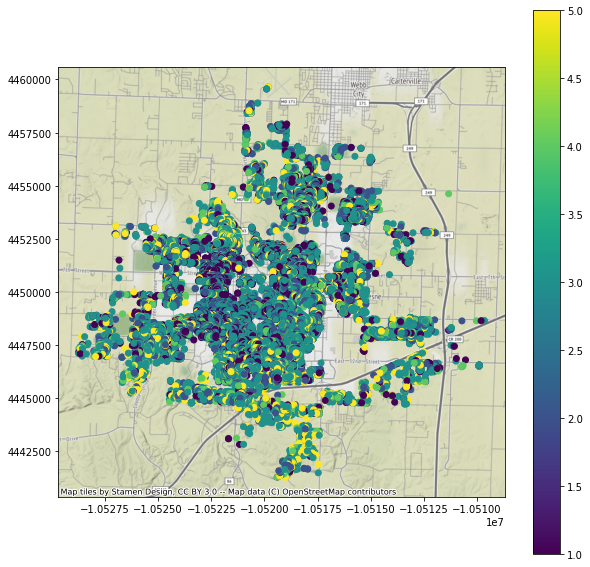

In [ ]:
# visualize population
gdf = hua_gdf
map = viz.plot_gdf_map(gdf,column='hhinc')
map

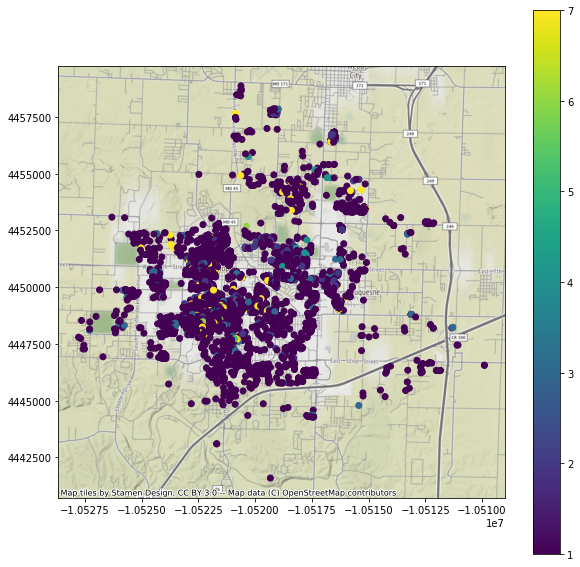

In [ ]:
# visualize population by income and tenure status
lowincome_renters_gdf = hua_gdf.loc[(hua_gdf.hhinc < 3) &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')]
map = viz.plot_gdf_map(lowincome_renters_gdf,column='race')
map

In [ ]:
# What location should the map be centered on?
center_x = hua_gdf.bounds.minx.mean()
center_y = hua_gdf.bounds.miny.mean()
center_x, center_y

(-94.50465283539467, 37.076483588486624)

In [ ]:
# https://ipyleaflet.readthedocs.io/en/latest/api_reference/heatmap.html
import ipyleaflet as ipylft
from ipyleaflet import Map, Heatmap

In [ ]:
print("ipyleaflet Version ",ipylft.__version__)

ipyleaflet Version  0.13.6


In [ ]:
popdata = lowincome_renters_gdf[['y','x','numprec']].values.tolist()

In [ ]:
from ipyleaflet import Map, Heatmap, LayersControl

map = Map(center=[center_y,center_x], zoom=11)

low_income_renters = Heatmap(
    locations = popdata,
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'yellow', 0.5: 'orange', 1.0: 'red'},
    name = 'Low Income Renters',
)

map.add_layer(low_income_renters);
control = LayersControl(position='topright')
map.add_control(control)
map

Map(center=[37.076483588486624, -94.50465283539467], controls=(ZoomControl(options=['position', 'zoom_in_text'…